In [1]:
#Imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.set_option('display.max_rows', 10)

#Raw data read

df = pd.read_csv('movies_raw.csv')

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [2]:
df.shape

(6820, 15)

In [3]:
df.columns

Index(['budget', 'company', 'country', 'director', 'genre', 'gross', 'name',
       'rating', 'released', 'runtime', 'score', 'star', 'votes', 'writer',
       'year'],
      dtype='object')

In [4]:
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
             ...   
score       float64
star         object
votes         int64
writer       object
year          int64
Length: 15, dtype: object

In [5]:
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
           ..
score       0
star        0
votes       0
writer      0
year        0
Length: 15, dtype: int64

In [6]:
df['company'].value_counts()

Universal Pictures                        302
Warner Bros.                              294
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
                                         ... 
1992 Number Four Limited Partnership        1
Euforia Film                                1
Crystal Sky Worldwide                       1
Fear and Loathing LLC                       1
Aim                                         1
Name: company, Length: 2179, dtype: int64

In [7]:
df['director'].value_counts()

Woody Allen          33
Clint Eastwood       24
Steven Soderbergh    21
Steven Spielberg     21
Ron Howard           20
                     ..
Tim Roth              1
Robert Resnikoff      1
Gary Grillo           1
Harry Hook            1
Mark Burton           1
Name: director, Length: 2759, dtype: int64

In [8]:
df['genre'].value_counts()

Comedy       2080
Drama        1444
Action       1331
Crime         522
Adventure     392
             ... 
Family         14
Sci-Fi         13
Musical         4
Western         2
War             2
Name: genre, Length: 17, dtype: int64

In [9]:
df['country'].value_counts()

USA             4872
UK               698
France           283
Canada           150
Germany          134
                ... 
Aruba              1
Kenya              1
Saudi Arabia       1
Jamaica            1
Malta              1
Name: country, Length: 57, dtype: int64

In [10]:
df['year'].value_counts()

1989    221
1988    220
1990    220
2011    220
2007    220
       ... 
2004    220
2000    220
1996    220
2015    220
1987    219
Name: year, Length: 31, dtype: int64

In [11]:
df['star'].value_counts()

Nicolas Cage           42
Robert De Niro         38
Denzel Washington      36
Tom Hanks              35
Bruce Willis           33
                       ..
Michael Schoeffling     1
Koen De Bouw            1
Winston Chao            1
Tracy Camilla Johns     1
Al Pillay               1
Name: star, Length: 2504, dtype: int64

In [12]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- budget ---
0.0           2182
20000000.0     207
30000000.0     191
25000000.0     177
15000000.0     170
              ... 
9600000.0        1
6428966.0        1
300000.0         1
34200000.0       1
17080000.0       1
Name: budget, Length: 351, dtype: int64
---- company ---
Universal Pictures                        302
Warner Bros.                              294
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
                                         ... 
1992 Number Four Limited Partnership        1
Euforia Film                                1
Crystal Sky Worldwide                       1
Fear and Loathing LLC                       1
Aim                                         1
Name: company, Length: 2179, dtype: int64
---- country ---
USA             4872
UK               698
France           283
Canada           150
Germany          134
                ... 
Aruba              1
Kenya 

In [13]:
df2 = df

df2['budget'] = df2['budget'].astype('int64')
df2['gross'] = df2['gross'].astype('int64')

df2.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [14]:
df2['release_year'] = df2['released'].astype(str).str[:4]
df2['release_year'] = df2['release_year'].astype('int64')
df2.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [15]:
df3 = df2.sort_values(by=['gross'], inplace=False, ascending=False)
df3

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


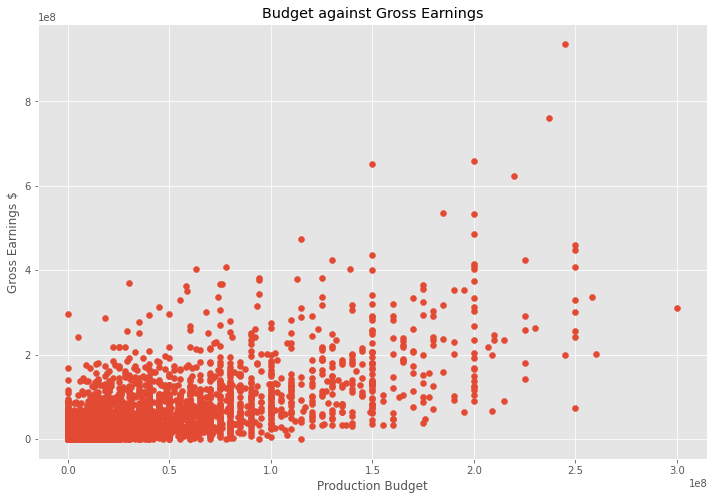

In [16]:
plt.scatter(x=df3['budget'], y=df3['gross'])
plt.title('Budget against Gross Earnings')
plt.xlabel('Production Budget')
plt.ylabel('Gross Earnings $')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

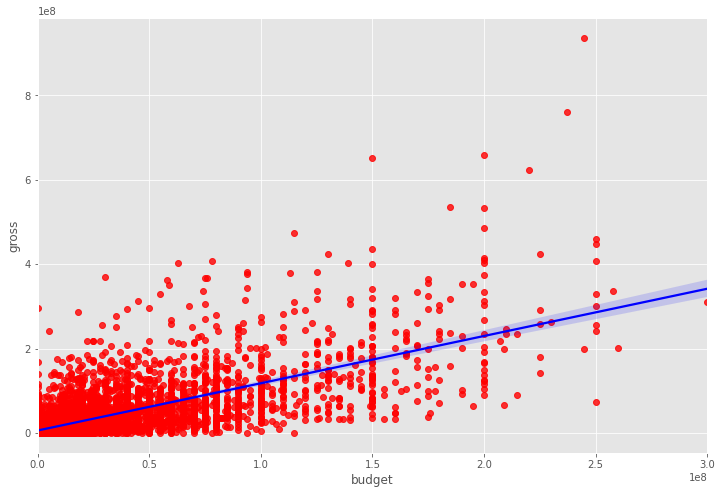

In [17]:
sns.regplot(x='budget', y='gross', data=df3, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [18]:
df3.corr(method='pearson')

,budget,gross,runtime,score,votes,year,release_year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009,0.274820
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548,0.176879
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639,0.088342
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276,0.117679
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304,0.220797
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000,0.996229
release_year,0.274820,0.176879,0.088342,0.117679,0.220797,0.996229,1.000000


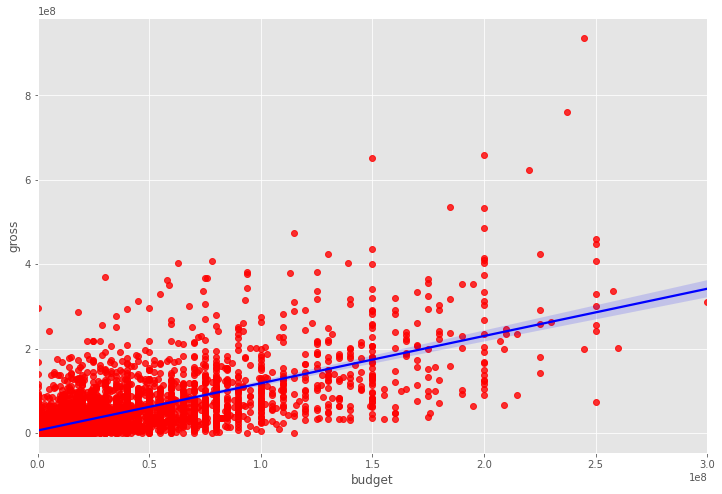

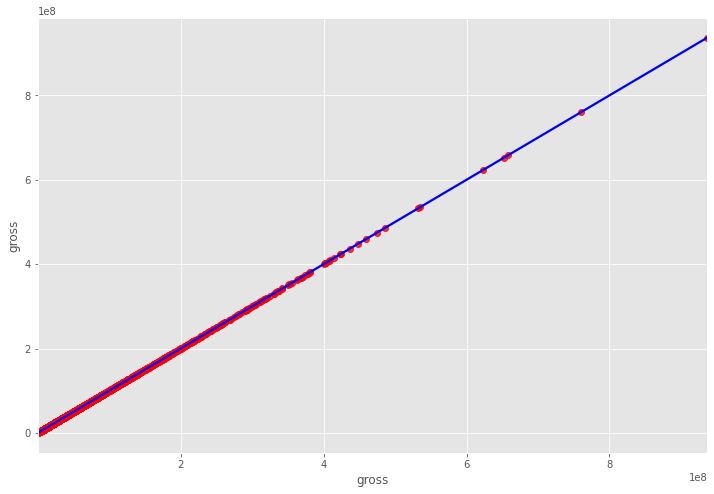

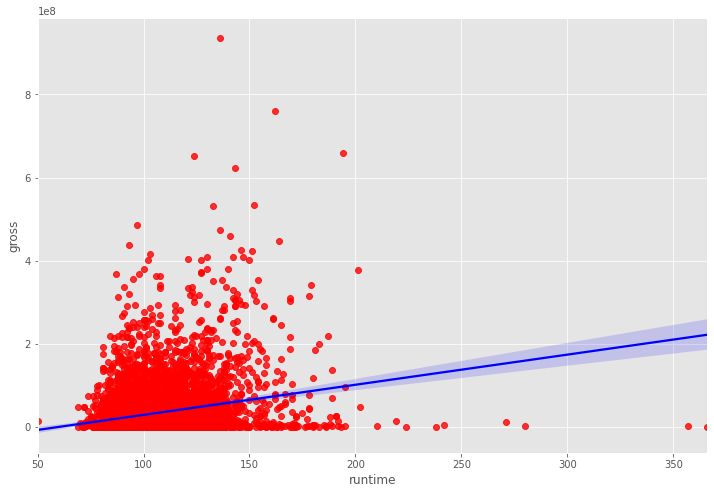

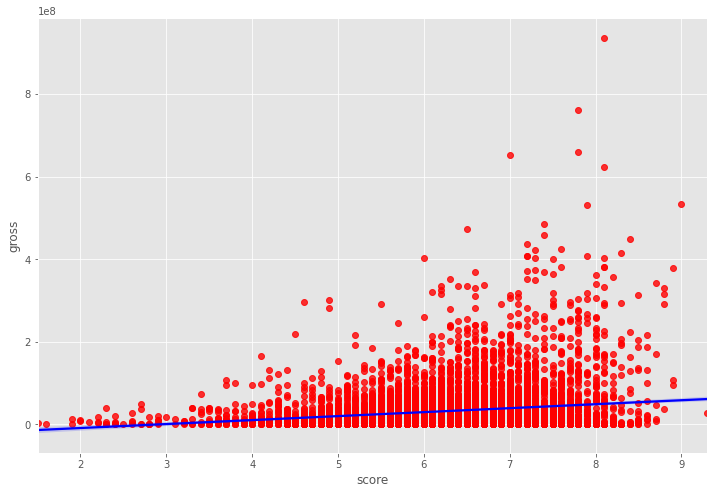

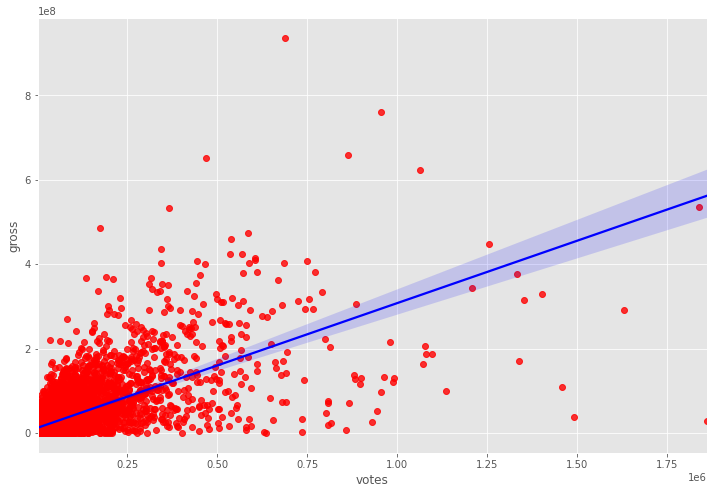

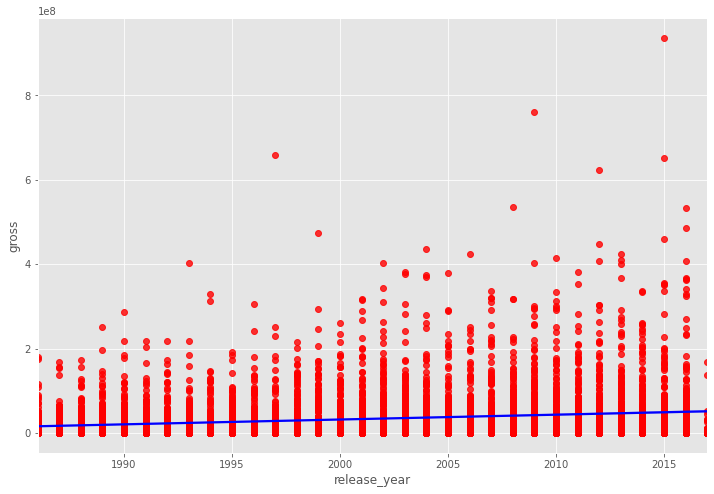

In [19]:
lst = ['budget', 'gross', 'runtime', 'score', 'votes','release_year']
for i in lst:
    plt.figure(i)
    sns.regplot(x=i, y='gross', data=df3, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

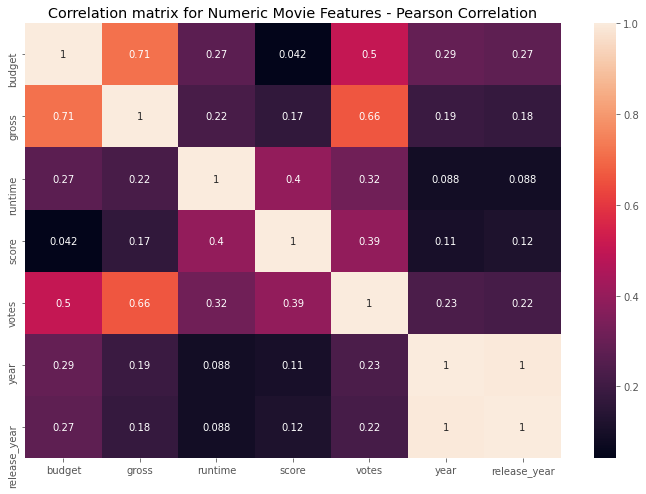

In [20]:
correlation_matrix = df3.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric Movie Features - Pearson Correlation')

plt.show()

In [21]:
df3.corr(method='kendall')

,budget,gross,runtime,score,votes,year,release_year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114,0.199319
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585,0.081204
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785,0.074211
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451,0.079344
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625,0.329934
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000,0.981751
release_year,0.199319,0.081204,0.074211,0.079344,0.329934,0.981751,1.000000


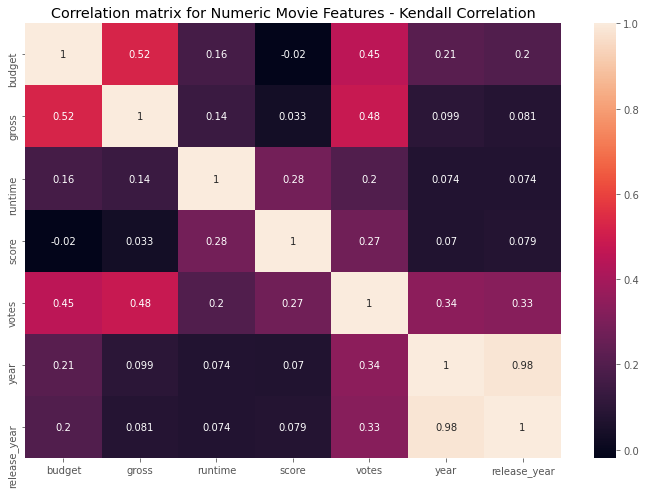

In [22]:
correlation_matrix = df.corr(method='kendall')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric Movie Features - Kendall Correlation')

plt.show()

In [23]:
df3.corr(method='spearman')

,budget,gross,runtime,score,votes,year,release_year
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553,0.279990
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467,0.113332
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902,0.108701
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598,0.116755
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588,0.473438
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000,0.996250
release_year,0.279990,0.113332,0.108701,0.116755,0.473438,0.996250,1.000000


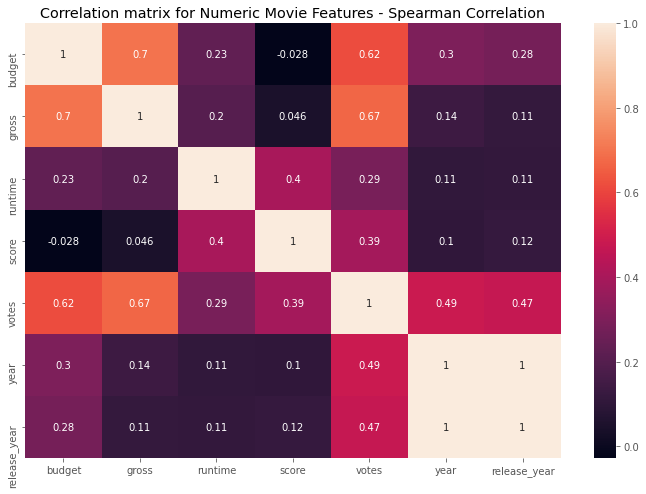

In [24]:
correlation_matrix = df.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric Movie Features - Spearman Correlation')

plt.show()

In [25]:
df3.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [26]:
df3.dtypes

budget           int64
company         object
country         object
director        object
genre           object
                 ...  
star            object
votes            int64
writer          object
year             int64
release_year     int64
Length: 16, dtype: object

In [27]:
df4_numeric = df3
        
df4_numeric.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [28]:

for col in df4_numeric.columns:
    if(df4_numeric[col].dtype == 'object'):
        df4_numeric[col]=df4_numeric[col].astype('category')
        df4_numeric[col] = df4_numeric[col].cat.codes
        
df4_numeric

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_year
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,2015
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,2009
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,1997
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,2015
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,2171,35,2071,0,547,2577,8,2059,104,7.2,748,16609,2981,2012,2013
5699,0,1262,53,2385,4,542,5204,6,1977,89,6.2,1335,9018,2903,2011,2012
6066,0,631,54,2484,5,441,2459,8,2125,106,5.7,1047,21070,2901,2013,2014
2594,15000000,764,54,883,4,309,6257,7,895,84,5.7,2459,5034,217,1997,1997


In [29]:
df4_numeric.corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.291009,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,0.028012
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.045204,-0.062707
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000087,0.001823
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
star,-0.015062,-0.003160,-0.014569,0.039813,0.008140,0.008381,-0.001910,0.007891,-0.025506,0.016019,0.009483,1.000000,-0.011920,0.035378,-0.026682,-0.026052
votes,0.503924,0.138662,0.078657,0.000639,-0.150519,0.662457,0.023665,0.011678,0.221736,0.317399,0.393607,-0.011920,1.000000,0.001154,0.229304,0.220797
writer,-0.015611,-0.004032,0.024982,0.298997,-0.000608,-0.009455,0.009821,0.010741,-0.004634,0.000759,0.012223,0.035378,0.001154,1.000000,-0.005664,-0.004546
year,0.291009,0.036272,-0.045204,-0.000087,-0.046259,0.191548,0.024624,0.016221,0.996187,0.087639,0.105276,-0.026682,0.229304,-0.005664,1.000000,0.996229


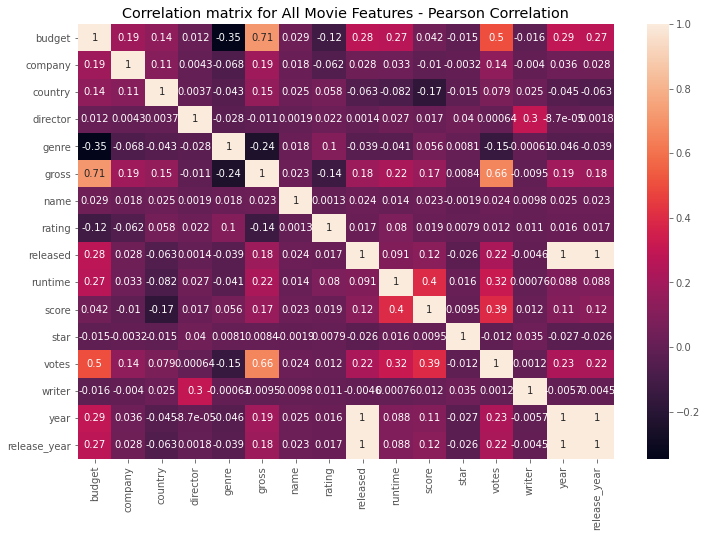

In [30]:
correlation_matrix = df4_numeric.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for All Movie Features - Pearson Correlation')

plt.show()

In [31]:
df3 = df2.sort_values(by=['gross'], inplace=False, ascending=False)
pd.set_option('display.max_rows', None)
df3.head(15)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
4840,185000000,Warner Bros.,USA,Christopher Nolan,Action,534858444,The Dark Knight,PG-13,2008-07-18,152,9.0,Christian Bale,1839571,Jonathan Nolan,2008,2008
6614,200000000,Lucasfilm,USA,Gareth Edwards,Action,532177324,Rogue One,PG-13,2016-12-16,133,7.9,Felicity Jones,365473,Chris Weitz,2016,2016
6687,200000000,Pixar Animation Studios,USA,Andrew Stanton,Animation,486295561,Finding Dory,PG,2016-06-17,97,7.4,Ellen DeGeneres,173005,Andrew Stanton,2016,2016
2870,115000000,Lucasfilm,USA,George Lucas,Action,474544677,Star Wars: Episode I - The Phantom Menace,PG,1999-05-19,136,6.5,Ewan McGregor,584809,George Lucas,1999,1999
6398,250000000,Marvel Studios,USA,Joss Whedon,Action,459005868,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,537832,Joss Whedon,2015,2015


In [32]:
corr_matrix = df4_numeric.corr(method='pearson')
corr_pairs = corr_matrix.unstack()

#corr_pairs

In [33]:
corr_pairs_sorted = corr_pairs.sort_values()
#corr_pairs_sorted

In [34]:
high_pos = corr_pairs_sorted[(corr_pairs_sorted)>0.5]
high_pos

votes         budget          0.503924
budget        votes           0.503924
votes         gross           0.662457
gross         votes           0.662457
              budget          0.712196
budget        gross           0.712196
released      year            0.996187
year          released        0.996187
release_year  year            0.996229
year          release_year    0.996229
release_year  released        0.999389
released      release_year    0.999389
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company    

In [35]:
high_neg = corr_pairs_sorted[(corr_pairs_sorted)<-0.5]
high_neg

Series([], dtype: float64)

In [36]:
#Award Votes and Production Budget had highest correlation to Gross Earnings